In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

image 1


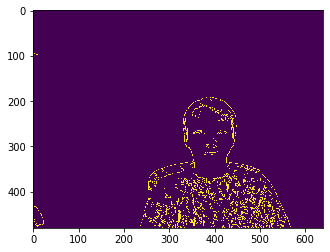

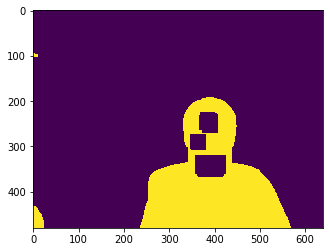

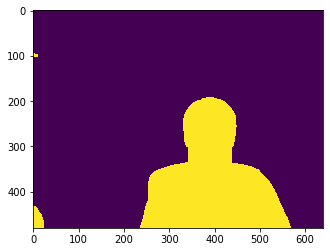

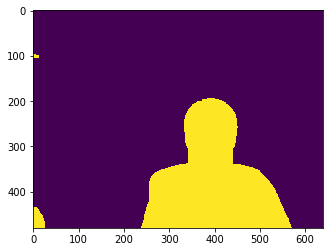

image 2


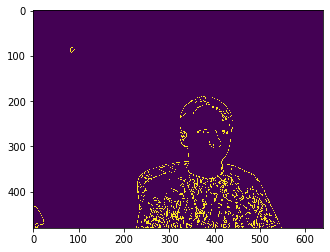

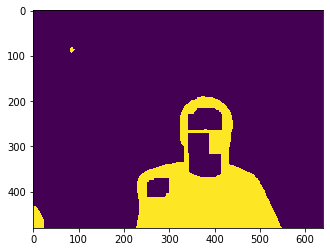

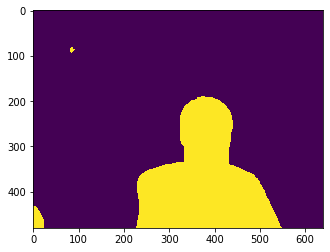

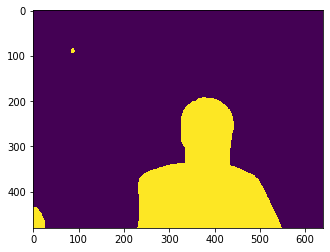

image 3


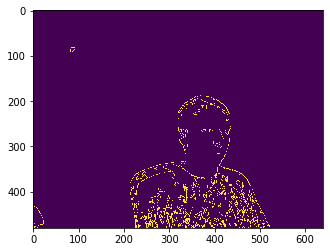

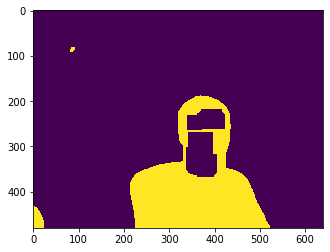

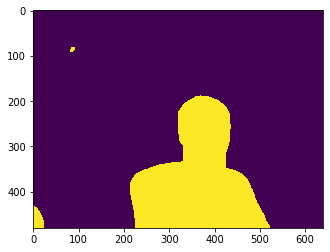

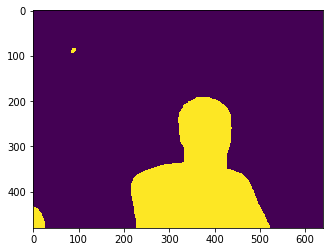

image 4


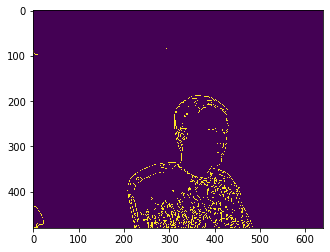

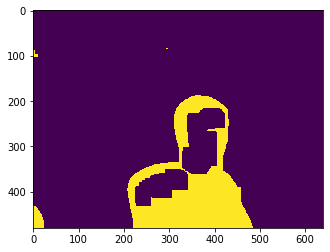

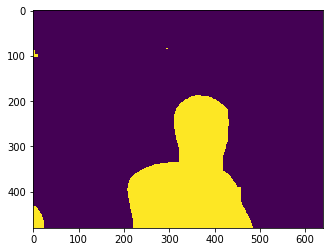

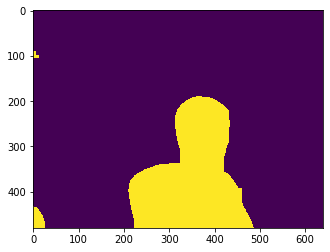

image 5


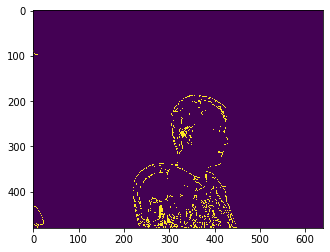

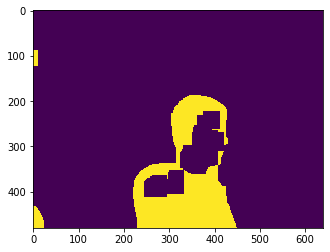

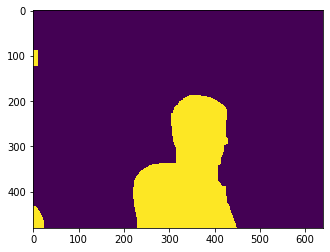

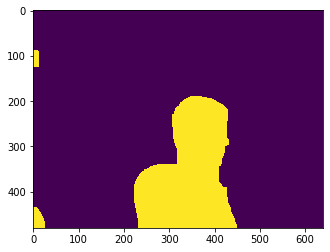

image 6


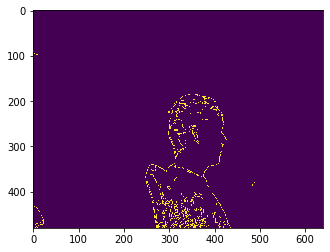

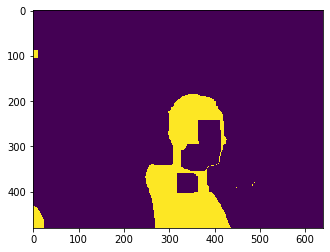

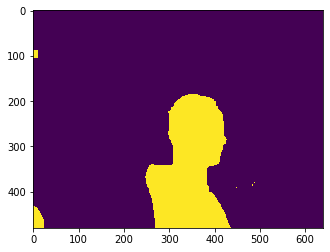

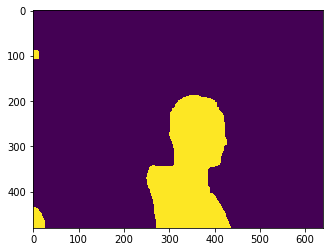

image 7


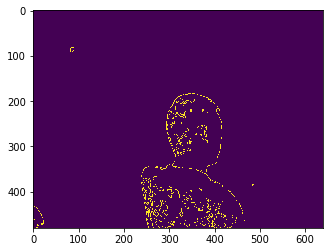

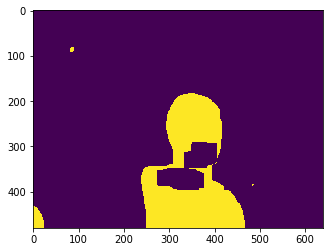

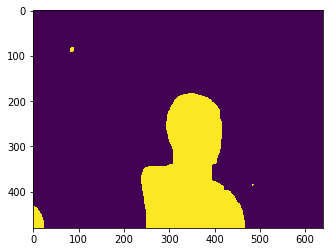

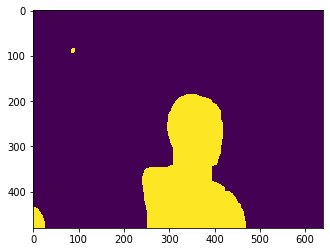

image 8


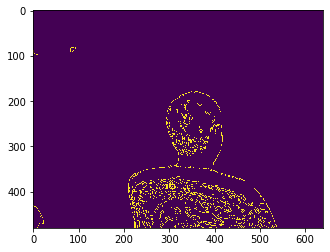

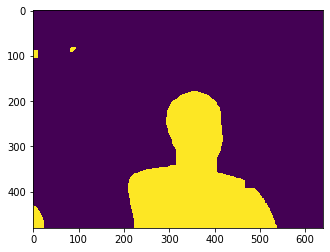

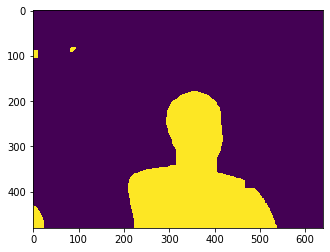

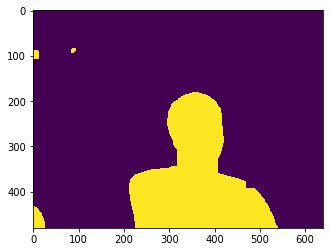

image 9


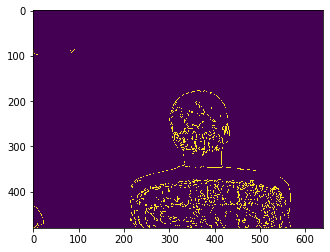

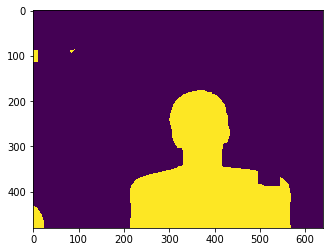

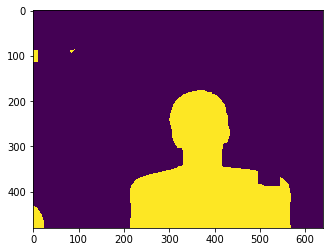

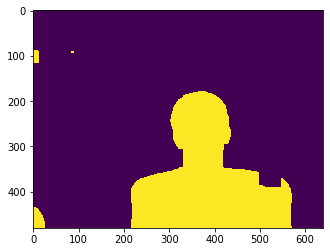

image 10


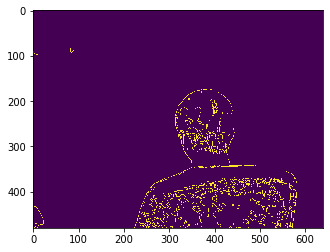

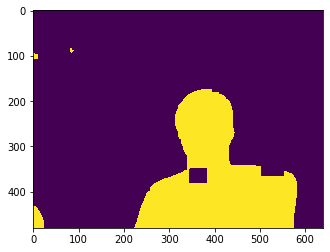

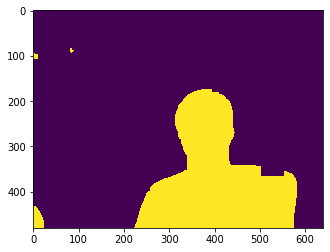

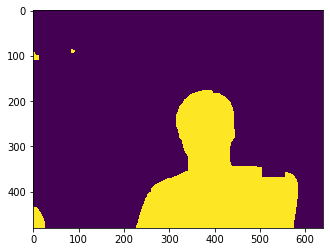

image 11


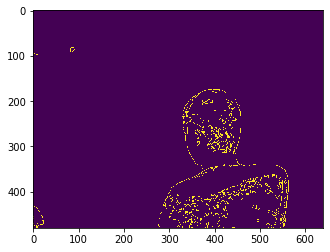

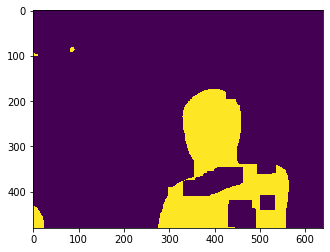

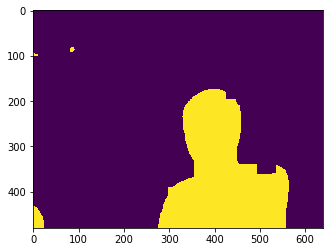

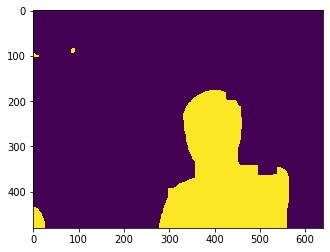

image 12


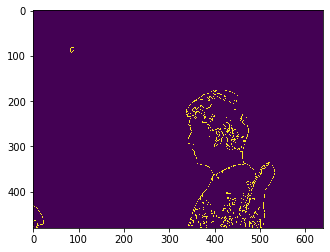

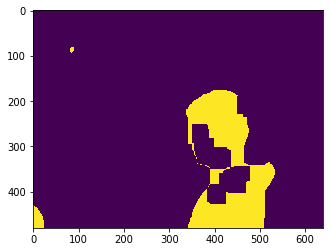

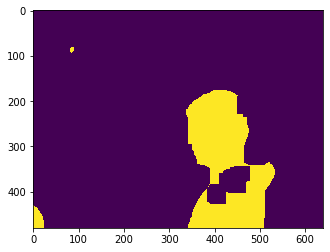

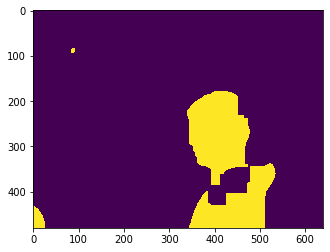

image 13


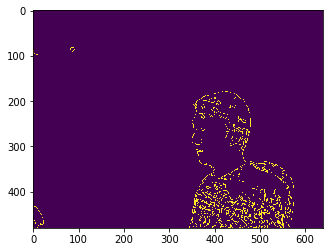

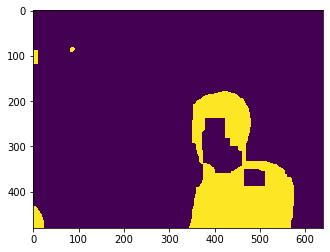

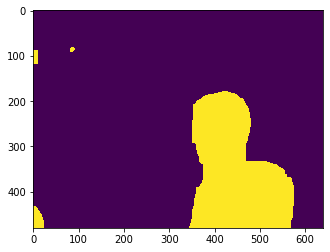

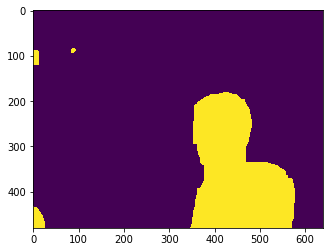

image 14


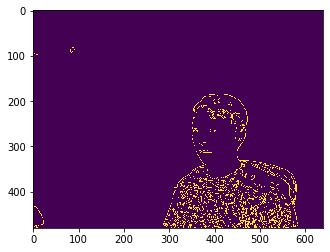

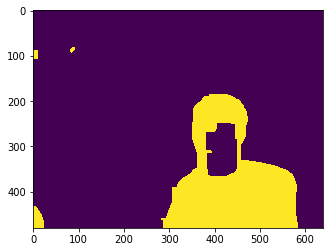

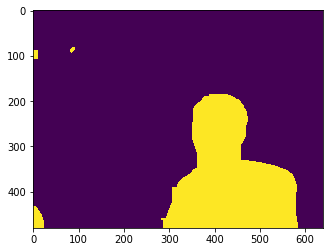

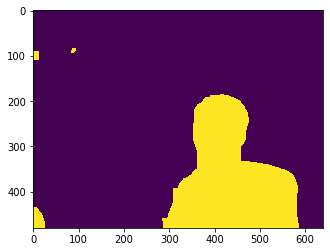

image 15


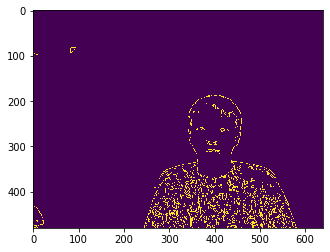

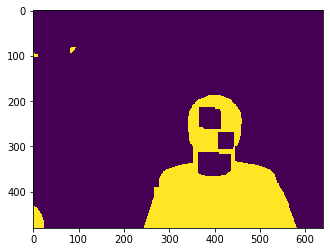

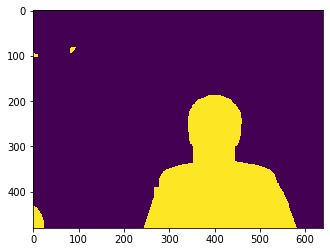

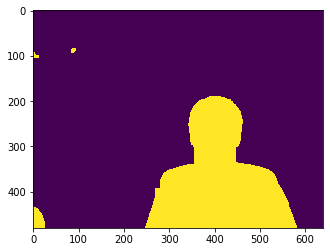

In [204]:
for i in range(1,16):
    print("image {}".format(i))
    rgb_hand = cv2.imread('./head_2d_image/full_1_{}.png'.format(i))
    
#     imgray = cv2.cvtColor(rgb_hand,cv2.COLOR_BGR2GRAY)
#     ret,thresh = cv2.threshold(imgray,127,255,0)

    hsv_hand = cv2.cvtColor(rgb_hand, cv2.COLOR_BGR2HSV)
    s = hsv_hand[:,:,1]
    # cv2.imshow("original",rgb_hand)
    # extract the edge and dilate
    edge = cv2.Canny(s,100,200)
    plt.imshow(edge);plt.show()
    plt.imsave("edge.png",edge)
    kernel = np.ones((3,3))
    # cv2.imshow("edge",edge)
    dilation = cv2.dilate(edge,kernel,iterations =16)
    erode = cv2.erode(dilation,kernel,iterations=16)
    # cv2.imshow("dilation",dilation)
    # 
    # cv2.imshow("closing",closing)
    plt.imshow(erode);plt.show()
    # flood fill
    # im_floodfill = closing.copy()
    erode[479,:] = 255
    im_floodfill = binary_fill_holes(erode)
    im_floodfill = im_floodfill*1
    im_floodfill = np.uint8(im_floodfill)
    plt.imshow(im_floodfill);plt.show()
    kernel = np.ones((4,4))
    dilation = cv2.dilate(im_floodfill,kernel,iterations = 1)
    erode = cv2.erode(dilation,kernel,iterations=1)
    # plt.imshow(dilation);plt.show()
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((4,4)))
    plt.imshow(opening);plt.show()

In [29]:
a = erode > 0

In [52]:
np.ravel(a).shape

(307200,)

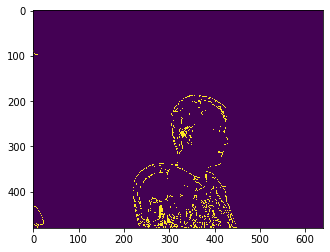

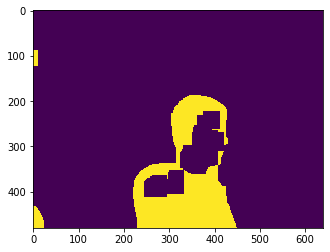

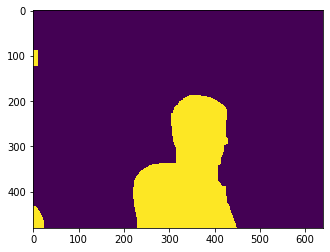

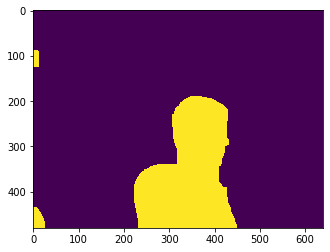

(307200,)
(45691,)
dangling removal done
color filter done.


In [208]:
# for i in range(1,16):
head = HEAD_RECON.threeD_head.read_from_file(1,5)
head.reset_filters()
# self.reset_filters()
head.edge_based_filter()
head.filter_nan()
head.filter_depth(1.5)
head.sparsify(1)
head.remove_dangling()
print("dangling removal done")
head.remove_background_color()
print("color filter done.")
head.center()
head.create_vpython_spheres()
head.save()

In [34]:
for i in range (1,16):
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    plt.imsave('head_2d_image/full_1_{}.png'.format(i),head.img_coord_from_xyz())

In [2]:
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [43]:
head.get_filtered_image()

(array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]), 'head_2d_image/head_1_1.png')

In [3]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
#     heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        heads.join_heads(i-1-first,i-first)
        heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

In [4]:
make_mhead(all_heads,5,6)

ids are not unique
Searching (head 0 and 1), 0/42 done, distance: 0.058478532807476086
ids are not unique
Searching (head 0 and 1), 1/42 done, distance: 0.076834146894509
ids are not unique
Searching (head 0 and 1), 2/42 done, distance: 0.0660683867904602
ids are not unique
Searching (head 0 and 1), 3/42 done, distance: 0.09062837236858838
ids are not unique
Searching (head 0 and 1), 4/42 done, distance: 0.09064909477980608
ids are not unique
Searching (head 0 and 1), 5/42 done, distance: 0.0877838347109574
ids are not unique
Searching (head 0 and 1), 6/42 done, distance: 0.08328069221955402
ids are not unique
Searching (head 0 and 1), 7/42 done, distance: 0.053535374304363365
Searching (head 0 and 1), 8/42 done, distance: 0.057258984539643246
ids are not unique
Searching (head 0 and 1), 9/42 done, distance: 0.07676526477788272
Searching (head 0 and 1), 10/42 done, distance: 0.0661719828083861
Searching (head 0 and 1), 11/42 done, distance: 0.040228048188686846
ids are not unique
Searc

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 0 and 1), 38/42 done, distance: 0.05298424165969011
Searching (head 0 and 1), 39/42 done, distance: 0.14232765210960033
Searching (head 0 and 1), 40/42 done, distance: 0.06549181943159207


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


25 min_dist 0.02042271382589576 params: [ 0.06 20.    4.  ]
ids are not unique
completed
